# 10. Machine Learning para Visão Computacional
Neste módulo iremos aprender como classificar imagens utilizando algoritmos de Machine Learning

Para o dataset, iremos escolher a base MNIST dataset que contém imagens binárias de dígitos manuscritos, conforme exemplo a seguir: 

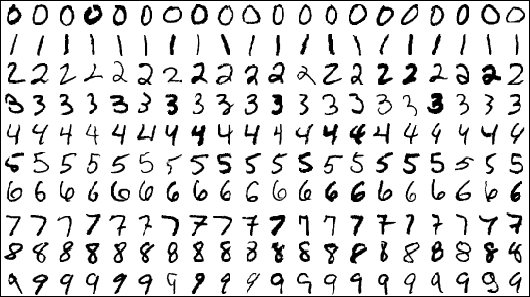



## 10.1 Etapas

* Formulação do problema
* Importar os dados
* Pré processamento
* Dividir o conjunto em treino e teste
* Criar o modelo
* Treinar o modelo 
* Fazer a predição
* Avaliar e aprimorar o modelo



### Formulação do problema

* Qual o nosso objetivo em classificar imagens? O principal objetivo em classificar imagens consiste em reconhecer se uma determinada imagem de entrada, pertence a uma das classes deste dataset. Para isso devemos criar um modelo capaz de aprender com esses dados e fazer previsões a partir dos dados de entrada
* Quais são as classes? Os números de zero a nove (problema multiclasse)
* Como escolher o algoritmo de classificação? 
* Como saber se o modelo perfomou bem? Através de algumas métricas de avaliação como a acurácia, matriz de confusão dentre outros
* Como escolher as métricas de avaliação? Através da literatura / pesquisa de métricas similares para resolução do problema em questão


### Importando as bibliotecas
Vamos iniciar o nosso projeto importando as bibliotecas

In [1]:
# importando as bibliotecas
import matplotlib.pyplot as plt

# import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

### Importando os dados

* Através do ScikitLearn podemos escolher diversos datasets para testar nossos modelos de ML.
* Trata-se de um ótimo começo para poder testar os seus primeiros modelos

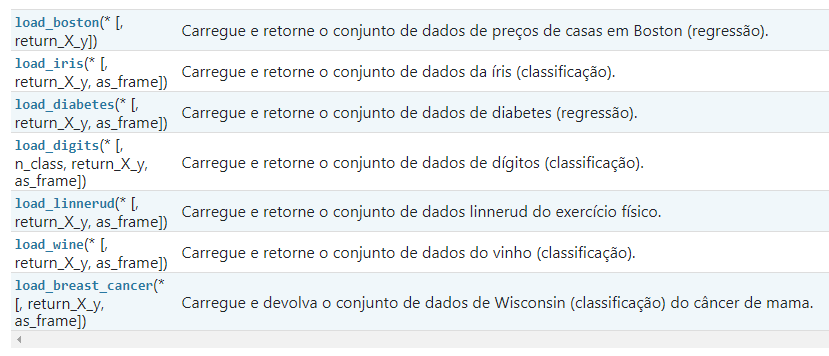

* Nesta etapa iremos importar o Mnist Dataset com o load_digits() e fazer a impressão de alguns exemplos do conjunto de treinamento.
* O conjunto de dados de dígitos consiste em imagens de dígitos de 8x8 pixels. 
* Os atributos de imagem do conjunto de dados armazena matrizes 8x8 de valores de tons de cinza para cada imagem. 
* Usaremos essas matrizes para visualizar as 4 primeiras imagens. 
* O atributo principal do conjunto de dados armazena o dígito que cada imagem representa e isso está incluído no título dos 4 gráficos abaixo.

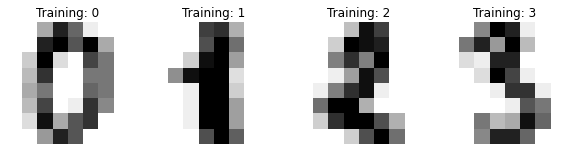

In [2]:
# importa o mnist dataset
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

### Classificação com SVM


#### Escolha dos parâmetros do modelo
* Neste exemplo, definimos o valor de gama manualmente. 
* É possível encontrar automaticamente bons valores para o
parâmetros usando ferramentas como grid search e cross validation.

In [3]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

Abaixo, visualizamos as primeiras 4 amostras de teste e mostramos seu valor de dígito previsto no título.

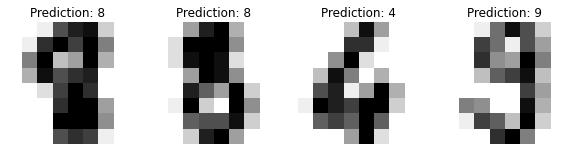

In [4]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

In [5]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




### Salvando o modelo

In [7]:
#importante o pacote para salvar o modelo
import pickle
#salvando o modelo
modelo_treinado = pickle.dumps(clf)

In [8]:
#carregando o modelo treinado
modelo_carregado = pickle.loads(modelo_treinado)
modelo_carregado.predict(data[0:1])

array([0])

In [9]:
#Olhando o conteúdo de um vetor de teste
X_test[0]

array([ 0.,  0.,  1., 11., 14., 15.,  3.,  0.,  0.,  1., 13., 16., 12.,
       16.,  8.,  0.,  0.,  8., 16.,  4.,  6., 16.,  5.,  0.,  0.,  5.,
       15., 11., 13., 14.,  0.,  0.,  0.,  0.,  2., 12., 16., 13.,  0.,
        0.,  0.,  0.,  0., 13., 16., 16.,  6.,  0.,  0.,  0.,  0., 16.,
       16., 16.,  7.,  0.,  0.,  0.,  0., 11., 13., 12.,  1.,  0.])

In [10]:
#fazendo predição do novo dado com o modelo carregado
modelo_carregado.predict([X_test[0]])

array([8])

### Avaliando o modelo

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


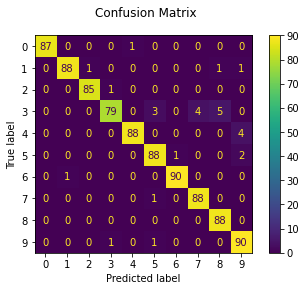

In [11]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

### Aprimorando o modelo

* Como podemos aprimorar o nosso modelo? Ajustando os parâmetros do modelo, modificando o algoritmo de treinamento, fazer atividades de pré processamento de dados, dentre outros.